# [네이버 영화 리뷰]

- 네이버 영화 사이트에서 "7번방의 선물"의 리뷰를 크롤링하여 형태소 분석기를 통해 워드클라우드를 만드는 과정

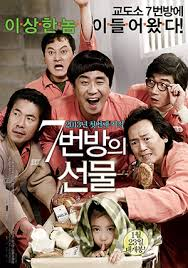

In [1]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd

pre = "https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=94775&type=after&onlyActualPointYn=N&onlySpoilerPointYn=N&order=highest&page="
review = []
rate = []


for i in range(1, 4460, 40):
    url = pre + str(i)
    res = requests.get(url)

    soup = BeautifulSoup(res.content,'html.parser')

    id_list = []
    id_pre = "_filtered_ment_"

    for i in range(10):
        id_list.append(id_pre+str(i))

    for id in id_list:
        review.append(soup.find("span", {"id":id}).get_text().strip())

        rate_list = []
        rate_list = (soup.select("div.star_score > em"))

    
    for r in rate_list:
        r = int(re.sub('<.+?>','',str(r)))
        rate.append(r)

df = pd.DataFrame({"review" : review, "rate" : rate})

In [2]:
df

,review,rate
0,그 이전 과거에도 가까운 과거에도 지금 2020년에도 억울한 누명을 씌울수있는 것도...,10
1,눈물정말 많이 나왔습니다...,10
2,연년생 아이 키우면서 우울해서 뛰쳐나와 영화관에서 이 영화보고 눈물콧물 다 흘리고....,10
3,보고 또봐도 눈물이 나오는 영화. 배우들의 연기력과 합도 잘맞고 스토리도 참신하다 ...,10
4,,10
...,...,...
1115,9점대 영화는 아님,1
1116,쉣이였음,1
1117,공감하기 어려운 영화적 환경과 등장 인물의 감정... 상투적인 전개.. 억지 눈물을...,1
1118,허범이 재미없다고 했음.,1


In [3]:
len(df)

1120

In [6]:
df.isnull().sum() # 결측치를 확인합니다.

review    0
rate      0
dtype: int64

In [7]:
df.to_csv('../data/review_HW.csv') # 데이터프레임을 CSV 파일로 저장

In [8]:
# !pip install konlpy
# !pip install wordcloud

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud

In [11]:
df = pd.read_csv("../data/review_HW.csv")
df

,Unnamed: 0,review,rate
0,0,그 이전 과거에도 가까운 과거에도 지금 2020년에도 억울한 누명을 씌울수있는 것도...,10
1,1,눈물정말 많이 나왔습니다...,10
2,2,연년생 아이 키우면서 우울해서 뛰쳐나와 영화관에서 이 영화보고 눈물콧물 다 흘리고....,10
3,3,보고 또봐도 눈물이 나오는 영화. 배우들의 연기력과 합도 잘맞고 스토리도 참신하다 ...,10
4,4,NaN,10
...,...,...,...
1115,1115,9점대 영화는 아님,1
1116,1116,쉣이였음,1
1117,1117,공감하기 어려운 영화적 환경과 등장 인물의 감정... 상투적인 전개.. 억지 눈물을...,1
1118,1118,허범이 재미없다고 했음.,1


# 결측치 제거

In [12]:
df.isnull().sum()

Unnamed: 0    0
review        2
rate          0
dtype: int64

In [13]:
df = df.dropna()

# 명사 추출

### 세종사전 실행

In [14]:
okt = Okt()

# 단어 리스트 만들기

In [15]:
word_list = []
word_list = df['review']

# 형태소 분리

In [16]:
sentences_tag = []

In [17]:
sentences_tag = []

for sentence in word_list:
    morph = okt.pos(sentence)
    sentences_tag.append(morph)

In [18]:
sentences_tag

[[('그', 'Noun'),
  ('이전', 'Noun'),
  ('과거', 'Noun'),
  ('에도', 'Josa'),
  ('가까운', 'Adjective'),
  ('과거', 'Noun'),
  ('에도', 'Josa'),
  ('지금', 'Noun'),
  ('2020년', 'Number'),
  ('에도', 'Foreign'),
  ('억울한', 'Adjective'),
  ('누명', 'Noun'),
  ('을', 'Josa'),
  ('씌울수있는', 'Verb'),
  ('것', 'Noun'),
  ('도', 'Josa'),
  ('충분한', 'Adjective'),
  ('현실', 'Noun'),
  ('이다', 'Josa'),
  ('다만', 'Noun'),
  ('감옥', 'Noun'),
  ('에', 'Josa'),
  ('아이', 'Noun'),
  ('를', 'Josa'),
  ('들여', 'Verb'),
  ('같이', 'Adverb'),
  ('자고', 'Noun'),
  ('같이', 'Adverb'),
  ('먹고', 'Verb'),
  ('하는', 'Verb'),
  ('설정', 'Noun'),
  ('은', 'Josa'),
  ('현실', 'Noun'),
  ('성', 'Suffix'),
  ('이', 'Josa'),
  ('매우', 'Noun'),
  ('부족하지만', 'Adjective'),
  ('그것', 'Noun'),
  ('또한', 'Noun'),
  ('영화', 'Noun'),
  ('의', 'Josa'),
  ('일부분', 'Noun'),
  ('이고', 'Josa'),
  ('부족한', 'Adjective'),
  ('아빠', 'Noun'),
  ('하지', 'Verb'),
  ('...', 'Punctuation')],
 [('눈물', 'Noun'),
  ('정말', 'Noun'),
  ('많이', 'Adverb'),
  ('나왔습니다', 'Verb'),
  ('...', 'Punctuation')],
 

# 명사 추출

In [19]:
noun_list = []
for sentence in sentences_tag:
    for word, tag in sentence:
        if tag in ["Noun"]:
            noun_list.append(word)

In [20]:
noun_list

['그',
 '이전',
 '과거',
 '과거',
 '지금',
 '누명',
 '것',
 '현실',
 '다만',
 '감옥',
 '아이',
 '자고',
 '설정',
 '현실',
 '매우',
 '그것',
 '또한',
 '영화',
 '일부분',
 '아빠',
 '눈물',
 '정말',
 '연년생',
 '아이',
 '영화관',
 '이',
 '영화',
 '보고',
 '눈물',
 '콧물',
 '가족',
 '충전',
 '집',
 '길',
 '아이',
 '기억',
 '보고',
 '또',
 '감동',
 '류승룡',
 '연기',
 '최고',
 '입',
 '보고',
 '또',
 '눈물',
 '영화',
 '배우',
 '연기력',
 '합',
 '스토리',
 '가족',
 '끼리',
 '보기',
 '최고',
 '영화',
 '제발',
 '평점',
 '중',
 '영화',
 '스토리',
 '욕',
 '이',
 '영화',
 '장르',
 '좀',
 '알',
 '건가',
 '코미디',
 '장르',
 '상',
 '열기구',
 '내용',
 '다소',
 '욕좀',
 '울음',
 '나',
 '영화',
 '최고',
 '진짜',
 '웰메읻',
 '볼',
 '때',
 '영화',
 '항상',
 '추석',
 '때',
 '특별',
 '영화로',
 '후반',
 '부',
 '눈물',
 '스토리',
 '부분',
 '배우',
 '연기',
 '볼',
 '때',
 '내용',
 '도',
 '눈물',
 '나',
 '최고',
 '영화',
 '내',
 '울',
 '몇',
 '영화',
 '하나',
 '번',
 '질리',
 '번',
 '눈물',
 '세상',
 '내',
 '이',
 '영화',
 '여지',
 '껏',
 '열연',
 '내',
 '다시',
 '아려',
 '수',
 '대의',
 '명작',
 '고유',
 '몇',
 '번',
 '감동',
 '여운',
 '영화',
 '출연',
 '배우',
 '누구',
 '하나',
 '구멍',
 '정말',
 '작품',
 '다소간',
 '배우',
 '연기력',
 '보완',
 '어쩌면',
 '출연',
 '배우',

# 두 글자 이상 단어만 추출

In [21]:
len(noun_list)

noun_list = [n for n in noun_list if len(n) > 1]
noun_list[:100]

['이전',
 '과거',
 '과거',
 '지금',
 '누명',
 '현실',
 '다만',
 '감옥',
 '아이',
 '자고',
 '설정',
 '현실',
 '매우',
 '그것',
 '또한',
 '영화',
 '일부분',
 '아빠',
 '눈물',
 '정말',
 '연년생',
 '아이',
 '영화관',
 '영화',
 '보고',
 '눈물',
 '콧물',
 '가족',
 '충전',
 '아이',
 '기억',
 '보고',
 '감동',
 '류승룡',
 '연기',
 '최고',
 '보고',
 '눈물',
 '영화',
 '배우',
 '연기력',
 '스토리',
 '가족',
 '끼리',
 '보기',
 '최고',
 '영화',
 '제발',
 '평점',
 '영화',
 '스토리',
 '영화',
 '장르',
 '건가',
 '코미디',
 '장르',
 '열기구',
 '내용',
 '다소',
 '욕좀',
 '울음',
 '영화',
 '최고',
 '진짜',
 '웰메읻',
 '영화',
 '항상',
 '추석',
 '특별',
 '영화로',
 '후반',
 '눈물',
 '스토리',
 '부분',
 '배우',
 '연기',
 '내용',
 '눈물',
 '최고',
 '영화',
 '영화',
 '하나',
 '질리',
 '눈물',
 '세상',
 '영화',
 '여지',
 '열연',
 '다시',
 '아려',
 '대의',
 '명작',
 '고유',
 '감동',
 '여운',
 '영화',
 '출연',
 '배우',
 '누구',
 '하나']

# 단어별 갯수 세기

In [23]:
counts = Counter(noun_list)
tags = counts.most_common(50)
tags

[('영화', 593),
 ('감동', 269),
 ('진짜', 175),
 ('정말', 161),
 ('눈물', 154),
 ('최고', 124),
 ('연기', 119),
 ('류승룡', 84),
 ('평점', 74),
 ('배우', 69),
 ('처음', 66),
 ('대박', 64),
 ('보고', 59),
 ('사람', 54),
 ('스토리', 50),
 ('생각', 45),
 ('완전', 43),
 ('재미', 40),
 ('그냥', 40),
 ('웃음', 39),
 ('정도', 35),
 ('아빠', 30),
 ('펑펑', 30),
 ('기도', 30),
 ('추천', 29),
 ('선물', 29),
 ('웃기', 28),
 ('마음', 28),
 ('가슴', 28),
 ('한번', 26),
 ('억지', 25),
 ('번방', 25),
 ('다가', 25),
 ('강추', 24),
 ('사랑', 23),
 ('장면', 23),
 ('다시', 22),
 ('영화관', 21),
 ('내용', 19),
 ('이영화', 18),
 ('모두', 18),
 ('감성', 18),
 ('마지막', 18),
 ('가족', 17),
 ('연기력', 17),
 ('하나', 17),
 ('한국영', 17),
 ('중간', 17),
 ('설정', 16),
 ('부분', 16)]

In [24]:
dic={("영화",593),('류승룡',84),('이영화',18),('진짜',175),('정말',161),('보고',59)}

In [25]:
for i ,j in dic:
    tags.remove((i,j))

In [26]:
tags

[('감동', 269),
 ('눈물', 154),
 ('최고', 124),
 ('연기', 119),
 ('평점', 74),
 ('배우', 69),
 ('처음', 66),
 ('대박', 64),
 ('사람', 54),
 ('스토리', 50),
 ('생각', 45),
 ('완전', 43),
 ('재미', 40),
 ('그냥', 40),
 ('웃음', 39),
 ('정도', 35),
 ('아빠', 30),
 ('펑펑', 30),
 ('기도', 30),
 ('추천', 29),
 ('선물', 29),
 ('웃기', 28),
 ('마음', 28),
 ('가슴', 28),
 ('한번', 26),
 ('억지', 25),
 ('번방', 25),
 ('다가', 25),
 ('강추', 24),
 ('사랑', 23),
 ('장면', 23),
 ('다시', 22),
 ('영화관', 21),
 ('내용', 19),
 ('모두', 18),
 ('감성', 18),
 ('마지막', 18),
 ('가족', 17),
 ('연기력', 17),
 ('하나', 17),
 ('한국영', 17),
 ('중간', 17),
 ('설정', 16),
 ('부분', 16)]

# 워드클라우드 생성

In [27]:
from PIL import Image # 워드클라우드용 마스크를 생성하기위한 라이브러리 import

In [81]:
custom_mask = np.array(Image.open("C:/Users/Kim/Desktop/1.jpg"))

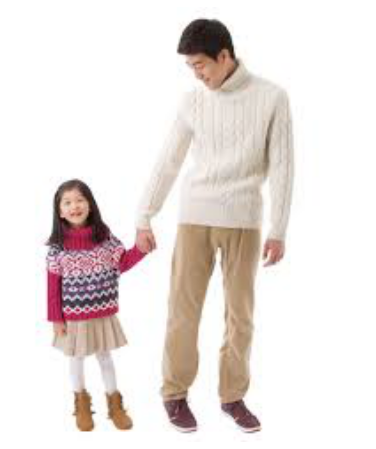

In [82]:
plt.figure(figsize=(8,8))
plt.imshow(custom_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

In [83]:
from wordcloud import ImageColorGenerator
image_colors = ImageColorGenerator(custom_mask) # 마스크용 사진의 색을 입력

{'감동': 269, '눈물': 154, '최고': 124, '연기': 119, '평점': 74, '배우': 69, '처음': 66, '대박': 64, '사람': 54, '스토리': 50, '생각': 45, '완전': 43, '재미': 40, '그냥': 40, '웃음': 39, '정도': 35, '아빠': 30, '펑펑': 30, '기도': 30, '추천': 29, '선물': 29, '웃기': 28, '마음': 28, '가슴': 28, '한번': 26, '억지': 25, '번방': 25, '다가': 25, '강추': 24, '사랑': 23, '장면': 23, '다시': 22, '영화관': 21, '내용': 19, '모두': 18, '감성': 18, '마지막': 18, '가족': 17, '연기력': 17, '하나': 17, '한국영': 17, '중간': 17, '설정': 16, '부분': 16}


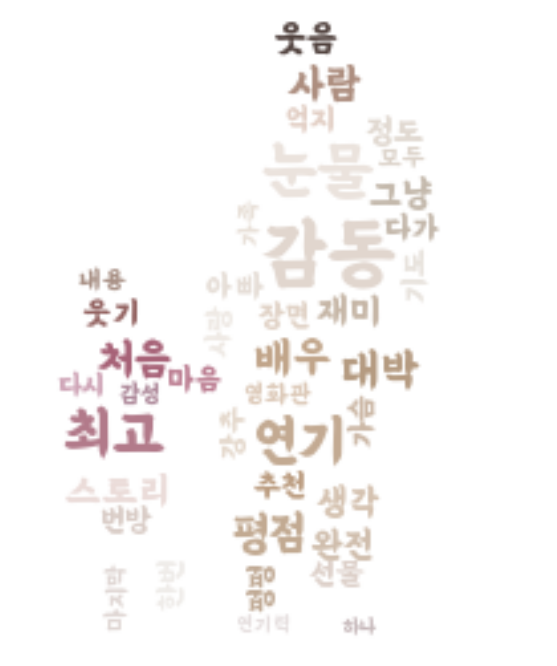

In [88]:
wordcloud = WordCloud(font_path="C:/Users/Kim/Downloads/BMEULJIROTTF.ttf",
                     background_color='white',width=800, height=600,
                     max_words=40, mask=custom_mask, # word의 최대 갯수와 마스크, font-size설정
                     max_font_size=30)
print(dict(tags))

cloud = wordcloud.generate_from_frequencies(dict(tags))
plt.figure(figsize=(12,12))
plt.axis('off')
plt.imshow(cloud.recolor(color_func=image_colors), interpolation='bilinear') # 마스크용 이미지의 색으로 워드클라우드 생성
plt.show()

https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

# TF-IDF 계산

In [32]:
from math import log

In [53]:
df = pd.read_csv("../data/review_HW.csv")

In [54]:
df

,Unnamed: 0,review,rate
0,0,그 이전 과거에도 가까운 과거에도 지금 2020년에도 억울한 누명을 씌울수있는 것도...,10
1,1,눈물정말 많이 나왔습니다...,10
2,2,연년생 아이 키우면서 우울해서 뛰쳐나와 영화관에서 이 영화보고 눈물콧물 다 흘리고....,10
3,3,보고 또봐도 눈물이 나오는 영화. 배우들의 연기력과 합도 잘맞고 스토리도 참신하다 ...,10
4,4,NaN,10
...,...,...,...
1115,1115,9점대 영화는 아님,1
1116,1116,쉣이였음,1
1117,1117,공감하기 어려운 영화적 환경과 등장 인물의 감정... 상투적인 전개.. 억지 눈물을...,1
1118,1118,허범이 재미없다고 했음.,1


In [55]:
len(df)

1120

In [56]:
df.isnull().sum()

Unnamed: 0    0
review        2
rate          0
dtype: int64

In [57]:
df = df.dropna()

In [58]:
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud

# 세종사전실행

In [59]:
okt = Okt()

# 단어리스트

In [60]:
word_list = []
word_list = df['review']

# 형태소분리

In [61]:
sentences_tag = []

for sentence in word_list:
    morph = okt.pos(sentence)
    sentences_tag.append(morph)

# 명사추출

In [62]:
noun_list = []
for sentence in sentences_tag:
    for word, tag in sentence:
        if tag in ["Noun"]:
            noun_list.append(word)

# 두글자 이상만 추출

In [63]:
len(noun_list)

noun_list = [n for n in noun_list if len(n) > 1]
noun_list = noun_list[:10]

In [64]:
docs = noun_list
vocab = list(set(w for doc in docs for w in doc.split()))
             
vocab.sort()

In [65]:
N = len(docs) # 총 문서의 수

def tf(t, d):
    return d.count(t)

def idf(t):
    df = 0
    for doc in docs:
        df += t in doc
    return log(N/(df + 1))

def tfidf(t, d):
    return tf(t,d) * idf(t)

In [66]:
result = []
for i in range(N): # 각 문서에 대해서 아래 명령을 수행
    result.append([])
    d = docs[i]
    for j in range(len(vocab)):
        t = vocab[j]
        result[-1].append(tf(t, d))
        
tf_ = pd.DataFrame(result, columns = vocab)
tf_

,감옥,과거,누명,다만,아이,이전,자고,지금,현실
0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,1
6,0,0,0,1,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0
8,0,0,0,0,1,0,0,0,0
9,0,0,0,0,0,0,1,0,0


In [67]:
result = []
for j in range(len(vocab)):
    t = vocab[j]
    result.append(idf(t))
    
idf_ = pd.DataFrame(result, index = vocab, columns = ["IDF"])
idf_

,IDF
감옥,1.609438
과거,1.203973
누명,1.609438
다만,1.609438
아이,1.609438
이전,1.609438
자고,1.609438
지금,1.609438
현실,1.609438


In [68]:
result = []
for i in range(N):
    result.append([])
    d = docs[i]
    for j in range(len(vocab)):
        t = vocab[j]
        
        result[-1].append(tfidf(t, d))
        
tfidf_ = pd.DataFrame(result, columns = vocab)
tfidf_

,감옥,과거,누명,다만,아이,이전,자고,지금,현실
0,0.000000,0.000000,0.000000,0.000000,0.000000,1.609438,0.000000,0.000000,0.000000
1,0.000000,1.203973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,1.203973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.609438,0.000000
4,0.000000,0.000000,1.609438,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.609438
6,0.000000,0.000000,0.000000,1.609438,0.000000,0.000000,0.000000,0.000000,0.000000
7,1.609438,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,1.609438,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.609438,0.000000,0.000000


- 매트릭스를 한눈에 보기위해 10개의 명사를 사용하여 정확한 결과는 나오지 않지만 의미 있는 단어로 나타난 값이 대부분 영화의 내용과 관련된 단어임을 추측할 수 있다.